[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]
R squared training set 0.68
R squared test set 0.82
MSE training set 0.64381
MSE test set 0.1973
정확도 : 0.8201
결정계수 : 0.820062761497177
y절편 :  4.511210285714285
[ 0.03826492  0.15860111 -0.04933558 -0.20191424  0.17837158  0.36161014
  0.         -0.09509872 -0.03204155  0.01662892  0.03415374  0.07260864
  0.24823092]


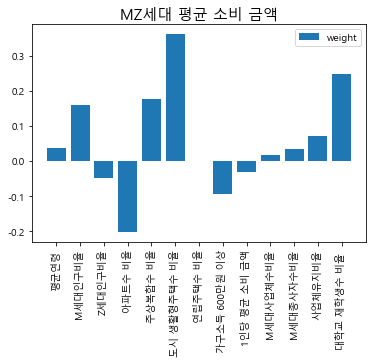

C:\Users\sshss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sshss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


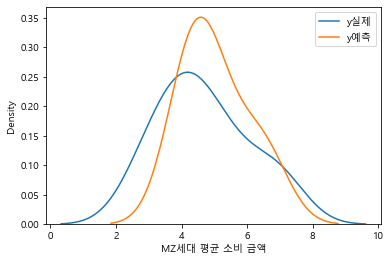

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 한글 인코딩
from matplotlib import font_manager, rc
import platform
import matplotlib
%matplotlib inline 

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus']=False
%matplotlib inline

#데이터 불러오기
#침수된 데이터가 침수되지 데이터에 비해 현저히 적은 것을 알 수 있음
data = pd.read_excel('MZ세대 행정동별 데이터셋 (최종2).xlsx')

data = data.iloc[:, :]
# data.head()

#data.columns


#Create labels and features
# 세대당인구, 가구소득 300만원 미만, 가구소득 300~600만원 미만, Z세대사업체수비율, Z세대종사자수비율, 사업체신규비율, 사업체이탈비율 상태변수 제거
X_numerical = data.drop(data.columns[[0, 1]], axis=1).astype('float64')
X_numerical = data.drop(['MZ세대 평균 소비 금액', '행정동', '세대당인구', '가구소득 300만원 미만', '가구소득 300~600만원 미만', 'Z세대사업체수비율', 'Z세대종사자수비율', '사업체신규비율', '사업체이탈비율'], axis=1).round(2)

list_numerical = X_numerical.columns
#list_numerical

# Create all features
X = data.iloc[:, 2:]
X = X.drop(['세대당인구', '가구소득 300만원 미만', '가구소득 300~600만원 미만', 'Z세대사업체수비율', 'Z세대종사자수비율', '사업체신규비율', '사업체이탈비율'], axis=1).round(2)

y = data['MZ세대 평균 소비 금액']


# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Rideg regression
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
results = model.fit(X_train, y_train)


# 후진 제거법 (Backward Elimination)
# feature selection의 읠환으로 변수를 줄인다
# 모든 독립변수(설명변수)를 고려한 모델에서 유의하지 않은 설명변수를 하나씩 제거하는 방법
# => 모든 변수를 입력한 뒤 가장 유의학률이 큰 설명 변수를 제외
# 모든 설명변수가 유의하다 판정될때 까지 반복
from sklearn.feature_selection import RFE # 반복적 변수 제거를 하여 변수별 중요도를 도출
rfe = RFE(model, n_features_to_select=13, step=1) # 골라낼 변수의 수, step: 한번에 몇개씩 제거할지 선택
model2 = rfe.fit(X, y) 
print(model2.support_)         # 선택된 변수
print(model2.ranking_)         # 변수 중요도(숫자 높을수록 불필요)


# Model evaluation
# R^2-score
print('R squared training set', round(model.score(X_train, y_train)*1, 2)) # 1에 가까울 수록 좋은 성능
print('R squared test set', round(model.score(X_test, y_test)*1, 2))

# Training data
from sklearn.metrics import mean_squared_error
pred_train = model.predict(X_train) # 0에 가까울 수록 좋은 성능
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 5))

# Test data
pred = model.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 5))


#예측 모델 생성
y_p = model.predict(X_test)

#print(X_train, y_train)
print('정확도 :', round(model.score(X_test, y_test), 4))
relation_square = model.score(X_test, y_test) #결정계수
print('결정계수 :', relation_square)
print('y절편 : ', model.intercept_)

print(model.coef_)


param = model.coef_
#for p in range(len(param)):
     #param[p] = abs(param[p])
plt.bar(X_train.columns, param, label='weight')
plt.title('MZ세대 평균 소비 금액', fontsize=15)
plt.xticks(X_train.columns, X_train.columns.tolist(), rotation='vertical')
plt.legend()
plt.show()

import seaborn as sns
ax1 = sns.distplot(y, hist = False, label = 'y실제')
ax2 = sns.distplot(y_p, hist = False, label = 'y예측')
plt.legend()


In [14]:
# 최종 상태변수 선정
X_numerical = data.drop(['MZ세대 평균 소비 금액', '행정동', '세대당인구', '가구소득 300만원 미만', '가구소득 300~600만원 미만', 'Z세대사업체수비율', 'Z세대종사자수비율', '사업체신규비율', '사업체이탈비율'], axis=1).round(2)
X_numerical

,평균연령,M세대인구비율,Z세대인구비율,아파트수 비율,주상복합수 비율,도시 생활형주택수 비율,연립주택수 비율,가구소득 600만원 이상,1인당 평균 소비 금액,M세대사업체수비율,M세대종사자수비율,사업체유지비율,대학교 재학생수 비율
0,41.85,21.21,13.48,11.85,0.00,1.10,0.00,17.6,11.16,10.86,8.89,8.78,0.22
1,42.50,28.90,22.08,0.85,0.00,1.86,0.00,13.6,7.60,11.46,11.95,17.82,0.00
2,39.60,23.10,21.20,11.17,6.84,3.11,51.28,20.5,7.91,7.88,4.70,14.65,0.69
3,39.00,22.80,12.42,20.53,25.19,2.36,0.00,11.7,8.01,5.51,4.85,7.46,0.00
4,40.20,19.84,12.74,8.97,0.00,0.00,0.00,37.5,12.87,7.80,7.15,2.77,0.00
5,38.40,24.36,9.67,0.00,0.00,0.00,0.00,36.7,9.05,2.56,3.53,5.82,0.00
6,37.10,29.12,14.34,4.63,19.12,2.61,48.72,29.1,9.21,14.54,9.90,6.53,0.08
7,38.80,24.71,14.46,9.49,0.00,0.00,0.00,45.9,5.95,22.29,16.05,6.79,0.00
8,40.30,23.80,13.89,12.81,0.00,0.00,0.00,14.0,5.60,7.41,8.27,5.35,0.00
9,37.00,21.74,13.27,9.55,0.00,0.77,0.00,33.5,14.41,2.80,2.65,7.47,0.00
